In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf
pd.set_option('display.max_column',None)
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv("C:\\Users\\HP\\OneDrive\\Desktop\\Machine Learning\\EXCEL SHEETS\\h1n1_vaccine_prediction.csv")
df

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


In [3]:
df.shape

(26707, 34)

In [4]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [5]:
columns_with_na = [i for i in df.columns if df[i].isnull().sum()>1]

In [6]:
for i in columns_with_na:
    print(i,round(df[i].isnull().sum()/len(df)*100,2), "% missing values")

h1n1_worry 0.34 % missing values
h1n1_awareness 0.43 % missing values
antiviral_medication 0.27 % missing values
contact_avoidance 0.78 % missing values
bought_face_mask 0.07 % missing values
wash_hands_frequently 0.16 % missing values
avoid_large_gatherings 0.33 % missing values
reduced_outside_home_cont 0.31 % missing values
avoid_touch_face 0.48 % missing values
dr_recc_h1n1_vacc 8.09 % missing values
dr_recc_seasonal_vacc 8.09 % missing values
chronic_medic_condition 3.64 % missing values
cont_child_undr_6_mnths 3.07 % missing values
is_health_worker 3.01 % missing values
has_health_insur 45.96 % missing values
is_h1n1_vacc_effective 1.46 % missing values
is_h1n1_risky 1.45 % missing values
sick_from_h1n1_vacc 1.48 % missing values
is_seas_vacc_effective 1.73 % missing values
is_seas_risky 1.92 % missing values
sick_from_seas_vacc 2.01 % missing values
qualification 5.27 % missing values
income_level 16.56 % missing values
marital_status 5.27 % missing values
housing_status 7.65 % 

In [7]:
df.drop(['has_health_insur'],axis=1,inplace=True)

In [8]:
# unique_id has no significance
df.drop(['unique_id'],axis=1,inplace=True)

In [9]:
numerical_columns = [i for i in df.columns if df[i].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_columns))

Number of numerical variables:  23


In [10]:
# there are year or date column in this data

In [11]:
year_feature = [i for i in numerical_columns if 'Yr' in i or 'Year' in i]
year_feature

[]

In [12]:
# getting the categorical columns. 
categorical_features=[i for i in df.columns if df[i].dtypes=='O']
print("categorical_features {}".format(len(categorical_features)))

categorical_features 9


In [13]:
categorical_features

['age_bracket',
 'qualification',
 'race',
 'sex',
 'income_level',
 'marital_status',
 'housing_status',
 'employment',
 'census_msa']

In [14]:
df["age_bracket"].mode()

0    65+ Years
Name: age_bracket, dtype: object

In [15]:
df["qualification"].mode()

0    College Graduate
Name: qualification, dtype: object

In [16]:
df["race"].mode()

0    White
Name: race, dtype: object

In [17]:
df["sex"].mode()

0    Female
Name: sex, dtype: object

In [18]:
df["income_level"].mode()

0    <= $75,000, Above Poverty
Name: income_level, dtype: object

In [19]:
df["marital_status"].mode()

0    Married
Name: marital_status, dtype: object

In [20]:
df["housing_status"].mode()

0    Own
Name: housing_status, dtype: object

In [21]:
df["employment"].mode()

0    Employed
Name: employment, dtype: object

In [22]:
df["census_msa"].mode()

0    MSA, Not Principle  City
Name: census_msa, dtype: object

qualification 5.27 % missing values

housing_status 7.65 % missing values

income_level 16.56 % missing values

marital_status 5.27 % missing values

employment 5.48 % missing values

In [23]:
values = {
    "qualification":"College Graduate",
    "housing_status":"Own",
    "income_level":"<= $75,000, Above Poverty",             # replacing the null values in categorical data with mode
    "marital_status": "Married",
    "employment": "Employed",}

df.fillna(value=values, inplace=True)

In [24]:
columns_with_na_2 = [i for i in df.columns if df[i].isnull().sum()>1]

In [25]:
for i in columns_with_na_2:
    print(i,round(df[i].isnull().sum()/len(df)*100,2), "% missing values")

h1n1_worry 0.34 % missing values
h1n1_awareness 0.43 % missing values
antiviral_medication 0.27 % missing values
contact_avoidance 0.78 % missing values
bought_face_mask 0.07 % missing values
wash_hands_frequently 0.16 % missing values
avoid_large_gatherings 0.33 % missing values
reduced_outside_home_cont 0.31 % missing values
avoid_touch_face 0.48 % missing values
dr_recc_h1n1_vacc 8.09 % missing values
dr_recc_seasonal_vacc 8.09 % missing values
chronic_medic_condition 3.64 % missing values
cont_child_undr_6_mnths 3.07 % missing values
is_health_worker 3.01 % missing values
is_h1n1_vacc_effective 1.46 % missing values
is_h1n1_risky 1.45 % missing values
sick_from_h1n1_vacc 1.48 % missing values
is_seas_vacc_effective 1.73 % missing values
is_seas_risky 1.92 % missing values
sick_from_seas_vacc 2.01 % missing values
no_of_adults 0.93 % missing values
no_of_children 0.93 % missing values


In [26]:
df["h1n1_worry"].mode()

0    2.0
Name: h1n1_worry, dtype: float64

In [27]:
df["h1n1_awareness"].mode()

0    1.0
Name: h1n1_awareness, dtype: float64

In [28]:
df["antiviral_medication"].mode()

0    0.0
Name: antiviral_medication, dtype: float64

In [29]:
df["contact_avoidance"].mode()

0    1.0
Name: contact_avoidance, dtype: float64

In [30]:
df["bought_face_mask"].mode()

0    0.0
Name: bought_face_mask, dtype: float64

In [31]:
df["wash_hands_frequently"].mode()

0    1.0
Name: wash_hands_frequently, dtype: float64

In [32]:
df["avoid_large_gatherings"].mode()

0    0.0
Name: avoid_large_gatherings, dtype: float64

In [33]:
df["reduced_outside_home_cont"].mode()

0    0.0
Name: reduced_outside_home_cont, dtype: float64

In [34]:
df["avoid_touch_face"].mode()

0    1.0
Name: avoid_touch_face, dtype: float64

In [35]:
df["dr_recc_h1n1_vacc"].mode()

0    0.0
Name: dr_recc_h1n1_vacc, dtype: float64

In [36]:
df["dr_recc_seasonal_vacc"].mode()

0    0.0
Name: dr_recc_seasonal_vacc, dtype: float64

In [37]:
df["chronic_medic_condition"].mode()

0    0.0
Name: chronic_medic_condition, dtype: float64

In [38]:
df["cont_child_undr_6_mnths"].mode()

0    0.0
Name: cont_child_undr_6_mnths, dtype: float64

In [39]:
df["is_health_worker"].mode()

0    0.0
Name: is_health_worker, dtype: float64

In [40]:
df["is_h1n1_vacc_effective"].mode()

0    4.0
Name: is_h1n1_vacc_effective, dtype: float64

In [41]:
df["is_h1n1_risky"].mode()

0    2.0
Name: is_h1n1_risky, dtype: float64

In [42]:
df["sick_from_h1n1_vacc"].mode()

0    2.0
Name: sick_from_h1n1_vacc, dtype: float64

In [43]:
df["is_seas_vacc_effective"].mode()

0    4.0
Name: is_seas_vacc_effective, dtype: float64

In [44]:
df["is_seas_risky"].mode()

0    2.0
Name: is_seas_risky, dtype: float64

In [45]:
df["sick_from_seas_vacc"].mode()

0    1.0
Name: sick_from_seas_vacc, dtype: float64

In [46]:
df["no_of_adults"].mode()

0    1.0
Name: no_of_adults, dtype: float64

In [47]:
df["no_of_children"].mode()

0    0.0
Name: no_of_children, dtype: float64

In [48]:
values = {
    "h1n1_worry":2.0, 
"h1n1_awareness":1.0, 
"antiviral_medication":0.0,
"contact_avoidance":1.0, 
"bought_face_mask":0.0, 
"wash_hands_frequently":1.0,
"avoid_large_gatherings":0.0,
"reduced_outside_home_cont":0.0,
"avoid_touch_face":1.0,
"dr_recc_h1n1_vacc":0.0,
"dr_recc_seasonal_vacc":0.0,
"chronic_medic_condition" :0.0,
"cont_child_undr_6_mnths" :0.0,
"is_health_worker" :0.0,
"is_h1n1_vacc_effective":4.0,
"is_h1n1_risky" :2.0,
"sick_from_h1n1_vacc":2.0,
"is_seas_vacc_effective" :4.0,
"is_seas_risky":2.0,
"sick_from_seas_vacc":1.0,
"no_of_adults":1.0,
"no_of_children":0.0,}

df.fillna(value=values, inplace=True)

In [49]:
#removed missing values becoz it contained only #5% of remaining values

df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)  

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26707 non-null  float64
 1   h1n1_awareness             26707 non-null  float64
 2   antiviral_medication       26707 non-null  float64
 3   contact_avoidance          26707 non-null  float64
 4   bought_face_mask           26707 non-null  float64
 5   wash_hands_frequently      26707 non-null  float64
 6   avoid_large_gatherings     26707 non-null  float64
 7   reduced_outside_home_cont  26707 non-null  float64
 8   avoid_touch_face           26707 non-null  float64
 9   dr_recc_h1n1_vacc          26707 non-null  float64
 10  dr_recc_seasonal_vacc      26707 non-null  float64
 11  chronic_medic_condition    26707 non-null  float64
 12  cont_child_undr_6_mnths    26707 non-null  float64
 13  is_health_worker           26707 non-null  flo

In [61]:
df["h1n1_worry"]=df["h1n1_worry"].astype('object')

In [62]:
df["h1n1_worry"].dtypes

dtype('O')

In [63]:
df["h1n1_vaccine"]=df["h1n1_vaccine"].astype('object')

In [64]:
df["h1n1_vaccine"].dtypes

dtype('O')

In [51]:
df

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",0.0,0.0,0
26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


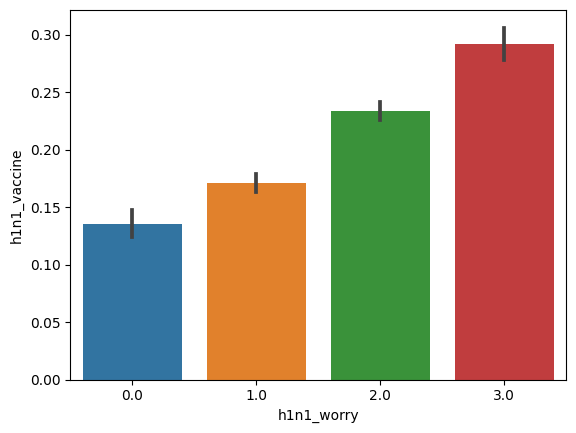

In [52]:
sns.barplot(x = 'h1n1_worry', y = 'h1n1_vaccine', data = df)
 
# Show the plot
plt.show()

 0=Not worried at all,
 
 1=Not very worried, 
 
 2=Somewhat worried, 
 
 3=Very worried.


In [53]:
# here you can see that more worried people has taken h1n1 vaccine more then compared to other people 

In [54]:
df.columns

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'is_h1n1_vacc_effective', 'is_h1n1_risky',
       'sick_from_h1n1_vacc', 'is_seas_vacc_effective', 'is_seas_risky',
       'sick_from_seas_vacc', 'age_bracket', 'qualification', 'race', 'sex',
       'income_level', 'marital_status', 'housing_status', 'employment',
       'census_msa', 'no_of_adults', 'no_of_children', 'h1n1_vaccine'],
      dtype='object')

'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'is_h1n1_vacc_effective', 'is_h1n1_risky',
       'sick_from_h1n1_vacc', 'is_seas_vacc_effective', 'is_seas_risky',
       'sick_from_seas_vacc', 'age_bracket', 'qualification', 'race', 'sex',
       'income_level', 'marital_status', 'housing_status', 'employment',
       'census_msa', 'no_of_adults', 'no_of_children', 'h1n1_vaccine'

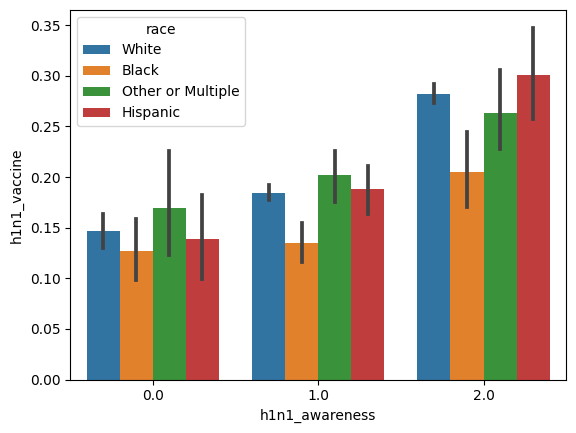

In [55]:
sns.barplot(x = 'h1n1_awareness', y = 'h1n1_vaccine',hue = "race" ,data = df)
 
# Show the plot
plt.show()

 0=No knowledge,
 1=little knowledge,
 2=good knowledge
 
 Respondent's race


In [56]:
# here you can see that the whites and hispanics race people has good knowlegde about the vaccine and they are one who has taken vaccine more then compared to other races
#and you can even see that black race people are less aware but still they are vaccinated  so it clearly shows they are less vaccinated then compared to other races 

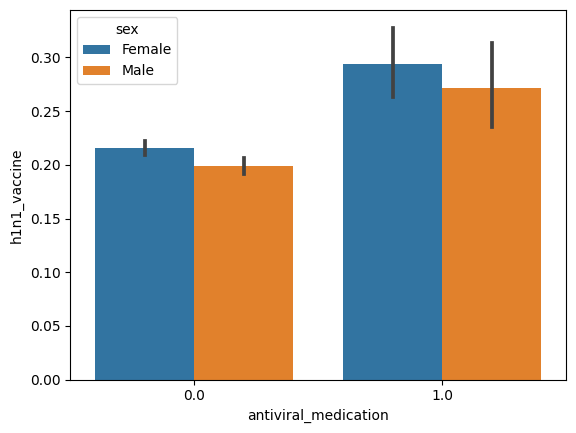

In [57]:
sns.barplot(x = 'antiviral_medication', y = 'h1n1_vaccine',hue = "sex",data = df)
 
# Show the plot
plt.show()

Has the respondent taken antiviral vaccination - (0,1)

In [58]:
# here you can see count of female are slightly high then compared to male who are vaccinated with antiviral vaccination 
# and contradictory same thing is for the people not vaccinated with antiviral vaccination 

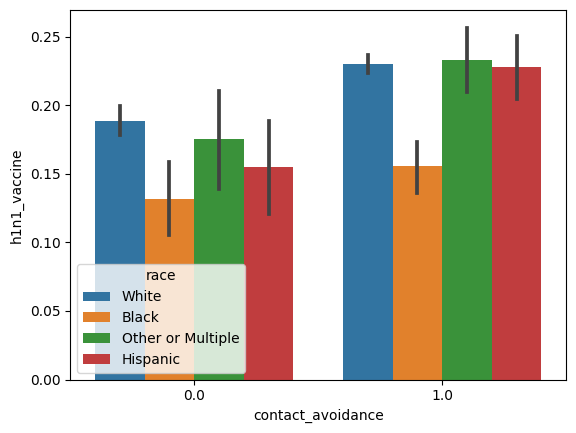

In [59]:
sns.barplot(x = 'contact_avoidance', y = 'h1n1_vaccine',hue="race", data = df)
 
# Show the plot
plt.show()

Has avoided any close contact with people who have flu-like symptoms - (0,1)

In [60]:
# here you can see that black people are less than compared to other races who avoided contact with people who have flu-like symptoms 

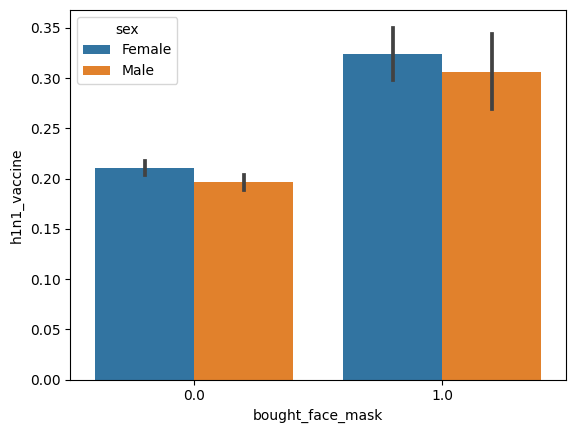

In [61]:
sns.barplot(x = 'bought_face_mask', y = 'h1n1_vaccine',hue = "sex",data = df)
 
# Show the plot
plt.show()

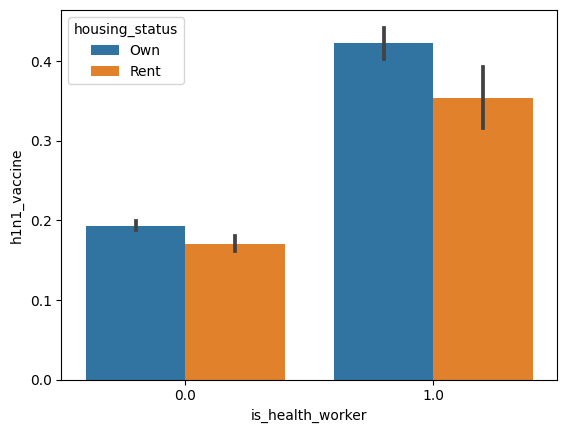

In [62]:
sns.barplot(x = 'is_health_worker', y = 'h1n1_vaccine',hue = "housing_status",data = df)
 
# Show the plot
plt.show()

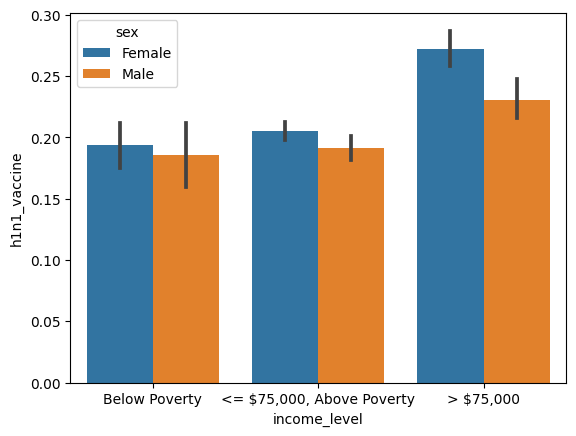

In [63]:
sns.barplot(x = 'income_level', y = 'h1n1_vaccine',hue = "sex",data = df)
 
# Show the plot
plt.show()

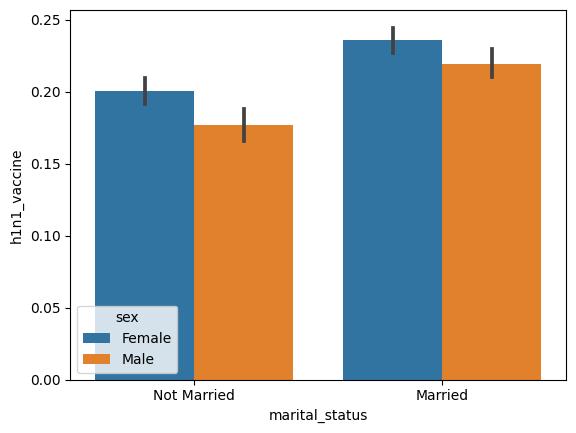

In [64]:
sns.barplot(x = 'marital_status', y = 'h1n1_vaccine',hue = "sex",data = df)
 
# Show the plot
plt.show()

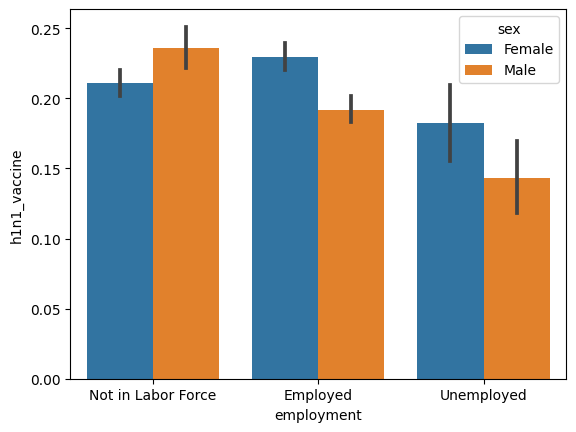

In [65]:
sns.barplot(x = 'employment', y = 'h1n1_vaccine',hue = "sex",data = df)
 
# Show the plot
plt.show()

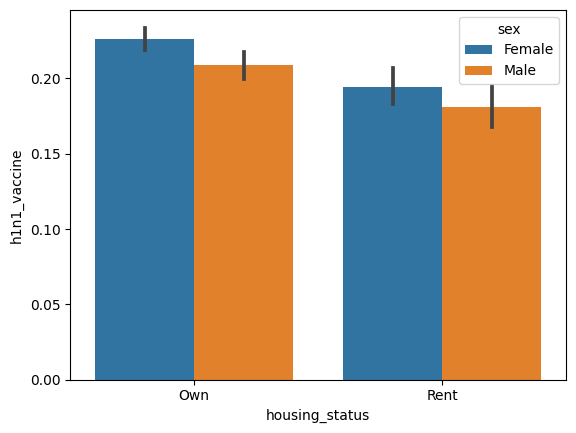

In [66]:
sns.barplot(x = 'housing_status', y = 'h1n1_vaccine',hue = "sex",data = df)
 
# Show the plot
plt.show()

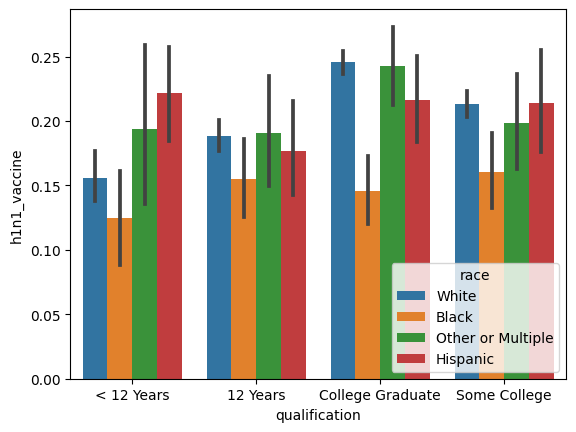

In [67]:
sns.barplot(x = 'qualification', y = 'h1n1_vaccine',hue = "race",data = df)
 
# Show the plot
plt.show()

In [ ]:
qualification 5.27 % missing values

housing_status 7.65 % missing values

income_level 16.56 % missing values

marital_status 5.27 % missing values

employment 5.48 % missing values

In [92]:
ct_table_ind=pd.crosstab(df["h1n1_worry"],df["h1n1_vaccine"])
print('contingency_table :\n',ct_table_ind)

contingency_table :
 h1n1_vaccine     0     1
h1n1_worry              
0.0           2849   447
1.0           6756  1397
2.0           8178  2489
3.0           3250  1341


In [93]:
ct_table_ind2=pd.crosstab(df["h1n1_awareness"],df["h1n1_vaccine"])
print('contingency_table :\n',ct_table_ind)

contingency_table :
 h1n1_vaccine     0     1
h1n1_worry              
0.0           2849   447
1.0           6756  1397
2.0           8178  2489
3.0           3250  1341


In [94]:
ct_table_ind3=pd.crosstab(df["antiviral_medication"],df["h1n1_vaccine"])
print('contingency_table :\n',ct_table_ind)

contingency_table :
 h1n1_vaccine     0     1
h1n1_worry              
0.0           2849   447
1.0           6756  1397
2.0           8178  2489
3.0           3250  1341


In [95]:
ct_table_ind4=pd.crosstab(df["contact_avoidance"],df["h1n1_vaccine"])
print('contingency_table :\n',ct_table_ind)

contingency_table :
 h1n1_vaccine     0     1
h1n1_worry              
0.0           2849   447
1.0           6756  1397
2.0           8178  2489
3.0           3250  1341


In [96]:
ct_table_ind5=pd.crosstab(df["bought_face_mask"],df["h1n1_vaccine"])
print('contingency_table :\n',ct_table_ind)

contingency_table :
 h1n1_vaccine     0     1
h1n1_worry              
0.0           2849   447
1.0           6756  1397
2.0           8178  2489
3.0           3250  1341


In [97]:
ct_table_ind6=pd.crosstab(df["wash_hands_frequently"],df["h1n1_vaccine"])
print('contingency_table :\n',ct_table_ind)

contingency_table :
 h1n1_vaccine     0     1
h1n1_worry              
0.0           2849   447
1.0           6756  1397
2.0           8178  2489
3.0           3250  1341


In [98]:
ct_table_ind7=pd.crosstab(df["avoid_large_gatherings"],df["h1n1_vaccine"])
print('contingency_table :\n',ct_table_ind)

contingency_table :
 h1n1_vaccine     0     1
h1n1_worry              
0.0           2849   447
1.0           6756  1397
2.0           8178  2489
3.0           3250  1341


In [99]:
ct_table_ind8=pd.crosstab(df["reduced_outside_home_cont"],df["h1n1_vaccine"])
print('contingency_table :\n',ct_table_ind)

contingency_table :
 h1n1_vaccine     0     1
h1n1_worry              
0.0           2849   447
1.0           6756  1397
2.0           8178  2489
3.0           3250  1341


In [100]:
ct_table_ind9=pd.crosstab(df["avoid_touch_face"],df["h1n1_vaccine"])
print('contingency_table :\n',ct_table_ind)

contingency_table :
 h1n1_vaccine     0     1
h1n1_worry              
0.0           2849   447
1.0           6756  1397
2.0           8178  2489
3.0           3250  1341


In [101]:
ct_table_ind10=pd.crosstab(df["dr_recc_h1n1_vacc"],df["h1n1_vaccine"])
print('contingency_table :\n',ct_table_ind)

contingency_table :
 h1n1_vaccine     0     1
h1n1_worry              
0.0           2849   447
1.0           6756  1397
2.0           8178  2489
3.0           3250  1341


In [102]:
ct_table_ind11=pd.crosstab(df["dr_recc_seasonal_vacc"],df["h1n1_vaccine"])
print('contingency_table :\n',ct_table_ind)

contingency_table :
 h1n1_vaccine     0     1
h1n1_worry              
0.0           2849   447
1.0           6756  1397
2.0           8178  2489
3.0           3250  1341


In [103]:
ct_table_ind12=pd.crosstab(df["chronic_medic_condition"],df["h1n1_vaccine"])
print('contingency_table :\n',ct_table_ind)

contingency_table :
 h1n1_vaccine     0     1
h1n1_worry              
0.0           2849   447
1.0           6756  1397
2.0           8178  2489
3.0           3250  1341


In [104]:
df.columns

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'is_h1n1_vacc_effective', 'is_h1n1_risky',
       'sick_from_h1n1_vacc', 'is_seas_vacc_effective', 'is_seas_risky',
       'sick_from_seas_vacc', 'age_bracket', 'qualification', 'race', 'sex',
       'income_level', 'marital_status', 'housing_status', 'employment',
       'census_msa', 'no_of_adults', 'no_of_children', 'h1n1_vaccine'],
      dtype='object')

In [105]:
ct_table_ind13=pd.crosstab(df["cont_child_undr_6_mnths"],df["h1n1_vaccine"])
print('contingency_table :\n',ct_table_ind)

contingency_table :
 h1n1_vaccine     0     1
h1n1_worry              
0.0           2849   447
1.0           6756  1397
2.0           8178  2489
3.0           3250  1341


In [106]:
ct_table_ind14=pd.crosstab(df["is_health_worker"],df["h1n1_vaccine"])
print('contingency_table :\n',ct_table_ind)

contingency_table :
 h1n1_vaccine     0     1
h1n1_worry              
0.0           2849   447
1.0           6756  1397
2.0           8178  2489
3.0           3250  1341


In [107]:
ct_table_ind15=pd.crosstab(df["is_h1n1_vacc_effective"],df["h1n1_vaccine"])
print('contingency_table :\n',ct_table_ind)

contingency_table :
 h1n1_vaccine     0     1
h1n1_worry              
0.0           2849   447
1.0           6756  1397
2.0           8178  2489
3.0           3250  1341


In [108]:
ct_table_ind16=pd.crosstab(df["is_h1n1_risky"],df["h1n1_vaccine"])
print('contingency_table :\n',ct_table_ind)

contingency_table :
 h1n1_vaccine     0     1
h1n1_worry              
0.0           2849   447
1.0           6756  1397
2.0           8178  2489
3.0           3250  1341


In [109]:
ct_table_ind17=pd.crosstab(df["sick_from_h1n1_vacc"],df["h1n1_vaccine"])
print('contingency_table :\n',ct_table_ind)

contingency_table :
 h1n1_vaccine     0     1
h1n1_worry              
0.0           2849   447
1.0           6756  1397
2.0           8178  2489
3.0           3250  1341


In [110]:
ct_table_ind18=pd.crosstab(df["is_seas_vacc_effective"],df["h1n1_vaccine"])
print('contingency_table :\n',ct_table_ind)

contingency_table :
 h1n1_vaccine     0     1
h1n1_worry              
0.0           2849   447
1.0           6756  1397
2.0           8178  2489
3.0           3250  1341


In [111]:
ct_table_ind19=pd.crosstab(df["is_seas_risky"],df["h1n1_vaccine"])
print('contingency_table :\n',ct_table_ind)

contingency_table :
 h1n1_vaccine     0     1
h1n1_worry              
0.0           2849   447
1.0           6756  1397
2.0           8178  2489
3.0           3250  1341


In [112]:
ct_table_ind20=pd.crosstab(df["sick_from_seas_vacc"],df["h1n1_vaccine"])
print('contingency_table :\n',ct_table_ind)

contingency_table :
 h1n1_vaccine     0     1
h1n1_worry              
0.0           2849   447
1.0           6756  1397
2.0           8178  2489
3.0           3250  1341


In [113]:
ct_table_ind21=pd.crosstab(df["age_bracket"],df["h1n1_vaccine"])
print('contingency_table :\n',ct_table_ind)

contingency_table :
 h1n1_vaccine     0     1
h1n1_worry              
0.0           2849   447
1.0           6756  1397
2.0           8178  2489
3.0           3250  1341


In [114]:
ct_table_ind22=pd.crosstab(df["qualification"],df["h1n1_vaccine"])
print('contingency_table :\n',ct_table_ind)

contingency_table :
 h1n1_vaccine     0     1
h1n1_worry              
0.0           2849   447
1.0           6756  1397
2.0           8178  2489
3.0           3250  1341


In [115]:
ct_table_ind23=pd.crosstab(df["race"],df["h1n1_vaccine"])
print('contingency_table :\n',ct_table_ind)

contingency_table :
 h1n1_vaccine     0     1
h1n1_worry              
0.0           2849   447
1.0           6756  1397
2.0           8178  2489
3.0           3250  1341


In [116]:
ct_table_ind24=pd.crosstab(df["sex"],df["h1n1_vaccine"])
print('contingency_table :\n',ct_table_ind)

contingency_table :
 h1n1_vaccine     0     1
h1n1_worry              
0.0           2849   447
1.0           6756  1397
2.0           8178  2489
3.0           3250  1341


In [117]:
ct_table_ind25=pd.crosstab(df["income_level"],df["h1n1_vaccine"])
print('contingency_table :\n',ct_table_ind)

contingency_table :
 h1n1_vaccine     0     1
h1n1_worry              
0.0           2849   447
1.0           6756  1397
2.0           8178  2489
3.0           3250  1341


In [118]:
ct_table_ind26=pd.crosstab(df["marital_status"],df["h1n1_vaccine"])
print('contingency_table :\n',ct_table_ind)

contingency_table :
 h1n1_vaccine     0     1
h1n1_worry              
0.0           2849   447
1.0           6756  1397
2.0           8178  2489
3.0           3250  1341


In [119]:
ct_table_ind27=pd.crosstab(df["housing_status"],df["h1n1_vaccine"])
print('contingency_table :\n',ct_table_ind)

contingency_table :
 h1n1_vaccine     0     1
h1n1_worry              
0.0           2849   447
1.0           6756  1397
2.0           8178  2489
3.0           3250  1341


In [120]:
ct_table_ind28=pd.crosstab(df["employment"],df["h1n1_vaccine"])
print('contingency_table :\n',ct_table_ind)

contingency_table :
 h1n1_vaccine     0     1
h1n1_worry              
0.0           2849   447
1.0           6756  1397
2.0           8178  2489
3.0           3250  1341


In [121]:
ct_table_ind29=pd.crosstab(df["census_msa"],df["h1n1_vaccine"])
print('contingency_table :\n',ct_table_ind)

contingency_table :
 h1n1_vaccine     0     1
h1n1_worry              
0.0           2849   447
1.0           6756  1397
2.0           8178  2489
3.0           3250  1341


In [122]:
ct_table_ind30=pd.crosstab(df["no_of_adults"],df["h1n1_vaccine"])
print('contingency_table :\n',ct_table_ind)

contingency_table :
 h1n1_vaccine     0     1
h1n1_worry              
0.0           2849   447
1.0           6756  1397
2.0           8178  2489
3.0           3250  1341


In [123]:
ct_table_ind31=pd.crosstab(df["no_of_children"],df["h1n1_vaccine"])
print('contingency_table :\n',ct_table_ind)

contingency_table :
 h1n1_vaccine     0     1
h1n1_worry              
0.0           2849   447
1.0           6756  1397
2.0           8178  2489
3.0           3250  1341


In [124]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(ct_table_ind)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     400.46
p-value:            1.7582e-86
degrees of freedom: 3
expected frequencies:
 [[2595.752724    700.247276  ]
 [6420.86527877 1732.13472123]
 [8400.75676789 2266.24323211]
 [3615.62522934  975.37477066]]


In [125]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(ct_table_ind2)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     396.79
p-value:            6.8778e-87
degrees of freedom: 2
expected frequencies:
 [[ 1973.59111843   532.40888157]
 [11587.95679035  3126.04320965]
 [ 7471.45209121  2015.54790879]]


In [126]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(ct_table_ind3)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     42.759
p-value:            6.1909e-11
degrees of freedom: 1
expected frequencies:
 [[20008.40221665  5397.59778335]
 [ 1024.59778335   276.40221665]]


In [127]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(ct_table_ind4)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     58.33
p-value:            2.2161e-14
degrees of freedom: 1
expected frequencies:
 [[ 5726.24941027  1544.75058973]
 [15306.75058973  4129.24941027]]


In [128]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(ct_table_ind5)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     131.73
p-value:            1.7112e-30
degrees of freedom: 1
expected frequencies:
 [[19583.12719512  5282.87280488]
 [ 1449.87280488   391.12719512]]


In [129]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(ct_table_ind6)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     148.03
p-value:            4.6798e-34
degrees of freedom: 1
expected frequencies:
 [[ 3662.09046317   987.90953683]
 [17370.90953683  4686.09046317]]


In [130]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(ct_table_ind7)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     8.6466
p-value:            0.0032767
degrees of freedom: 1
expected frequencies:
 [[13514.29512862  3645.70487138]
 [ 7518.70487138  2028.29512862]]


In [131]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(ct_table_ind8)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     12.906
p-value:            0.00032756
degrees of freedom: 1
expected frequencies:
 [[13960.04635489  3765.95364511]
 [ 7072.95364511  1908.04635489]]


In [132]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(ct_table_ind9)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     133.71
p-value:            6.3218e-31
degrees of freedom: 1
expected frequencies:
 [[ 6755.57247164  1822.42752836]
 [14277.42752836  3851.57247164]]


In [133]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(ct_table_ind10)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     4145.3
p-value:            0
degrees of freedom: 1
expected frequencies:
 [[16773.94941401  4525.05058599]
 [ 4259.05058599  1148.94941401]]


In [134]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(ct_table_ind11)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     1279.4
p-value:            3.3126e-280
degrees of freedom: 1
expected frequencies:
 [[14658.59995507  3954.40004493]
 [ 6374.40004493  1719.59995507]]


In [135]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(ct_table_ind12)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     237.28
p-value:            1.5428e-53
degrees of freedom: 1
expected frequencies:
 [[15291.78720935  4125.21279065]
 [ 5741.21279065  1548.78720935]]


In [136]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(ct_table_ind13)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     118.26
p-value:            1.5226e-27
degrees of freedom: 1
expected frequencies:
 [[19349.22593328  5219.77406672]
 [ 1683.77406672   454.22593328]]


In [137]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(ct_table_ind14)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     752.96
p-value:            9.1123e-166
degrees of freedom: 1
expected frequencies:
 [[18749.90317145  5058.09682855]
 [ 2283.09682855   615.90317145]]


In [138]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(ct_table_ind15)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     2431
p-value:            0
degrees of freedom: 4
expected frequencies:
 [[ 697.76605384  188.23394616]
 [1463.2610926   394.7389074 ]
 [3719.58134571 1003.41865429]
 [9508.83446287 2565.16553713]
 [5643.55704497 1522.44295503]]


In [139]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(ct_table_ind16)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     2842.3
p-value:            0
degrees of freedom: 4
expected frequencies:
 [[6409.83963006 1729.16036994]
 [8117.24008687 2189.75991313]
 [ 879.6892575   237.3107425 ]
 [4248.02493728 1145.97506272]
 [1378.20608829  371.79391171]]


In [140]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(ct_table_ind17)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     254.59
p-value:            6.6758e-54
degrees of freedom: 4
expected frequencies:
 [[7086.34193283 1911.65806717]
 [7500.59130565 2023.40869435]
 [ 116.55685775   31.44314225]
 [4607.14606657 1242.85393343]
 [1722.3638372   464.6361628 ]]


In [141]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(ct_table_ind18)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     1015.2
p-value:            1.7813e-218
degrees of freedom: 4
expected frequencies:
 [[ 961.59407646  259.40592354]
 [1737.32721758  468.67278242]
 [ 957.65634478  258.34365522]
 [9522.22275059 2568.77724941]
 [7854.19961059 2118.80038941]]


In [142]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(ct_table_ind19)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     1757.3
p-value:            0
degrees of freedom: 4
expected frequencies:
 [[4704.80181226 1269.19818774]
 [7456.48871082 2011.51128918]
 [ 533.16886958  143.83113042]
 [6008.97854495 1621.02145505]
 [2329.56206238  628.43793762]]


In [143]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(ct_table_ind20)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     45.128
p-value:            3.7405e-09
degrees of freedom: 4
expected frequencies:
 [[9771.08739282 2635.91260718]
 [6011.34118396 1621.65881604]
 [  74.0293556    19.9706444 ]
 [3821.17482308 1030.82517692]
 [1355.36724454  365.63275546]]


In [144]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(ct_table_ind21)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     69.446
p-value:            2.9716e-14
degrees of freedom: 4
expected frequencies:
 [[4107.05414311 1107.94585689]
 [3030.47830157  817.52169843]
 [4125.16770884 1112.83229116]
 [4381.12026809 1181.87973191]
 [5389.17957839 1453.82042161]]


In [145]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(ct_table_ind22)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     103.19
p-value:            3.2098e-22
degrees of freedom: 3
expected frequencies:
 [[4565.40611076 1231.59388924]
 [1860.97199236  502.02800764]
 [9059.93305126 2444.06694874]
 [5546.68884562 1496.31115438]]


In [146]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(ct_table_ind23)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     57.011
p-value:            2.5558e-12
degrees of freedom: 3
expected frequencies:
 [[ 1668.02314      449.97686   ]
 [ 1382.14381997   372.85618003]
 [ 1269.5246939    342.4753061 ]
 [16713.30834613  4508.69165387]]


In [147]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(ct_table_ind24)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     11.31
p-value:            0.00077092
degrees of freedom: 1
expected frequencies:
 [[12488.90979893  3369.09020107]
 [ 8544.09020107  2304.90979893]]


In [148]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(ct_table_ind25)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     90.84
p-value:            1.8807e-20
degrees of freedom: 2
expected frequencies:
 [[13545.79698206  3654.20301794]
 [ 5363.19054929  1446.80945071]
 [ 2124.01246864   572.98753136]]


In [149]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(ct_table_ind26)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     54.326
p-value:            1.6986e-13
degrees of freedom: 1
expected frequencies:
 [[11784.05582806  3178.94417194]
 [ 9248.94417194  2495.05582806]]


In [150]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(ct_table_ind27)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     25.445
p-value:            4.5507e-07
degrees of freedom: 1
expected frequencies:
 [[16363.63777287  4414.36222713]
 [ 4669.36222713  1259.63777287]]


In [151]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(ct_table_ind28)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     23.958
p-value:            6.2747e-06
degrees of freedom: 2
expected frequencies:
 [[11831.30860823  3191.69139177]
 [ 8057.38656532  2173.61343468]
 [ 1144.30482645   308.69517355]]


In [152]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(ct_table_ind29)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     0.11411
p-value:            0.94454
degrees of freedom: 2
expected frequencies:
 [[9170.97708466 2474.02291534]
 [6193.26438761 1670.73561239]
 [5668.75852773 1529.24147227]]


In [153]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(ct_table_ind30)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     28.248
p-value:            3.2214e-06
degrees of freedom: 3
expected frequencies:
 [[ 6344.47328416  1711.52671584]
 [11595.04470738  3127.95529262]
 [ 2207.49238027   595.50761973]
 [  885.98962819   239.01037181]]


In [154]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(ct_table_ind31)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     2.5613
p-value:            0.46432
degrees of freedom: 3
expected frequencies:
 [[14901.16422661  4019.83577339]
 [ 2500.45961733   674.54038267]
 [ 2255.53270678   608.46729322]
 [ 1375.84344928   371.15655072]]


In [155]:
df.drop(['census_msa'],axis=1,inplace=True)

In [156]:
df.drop(['no_of_children'],axis=1,inplace=True)

In [157]:
df.shape

(26707, 30)